In [1]:
import pandas as pd
import numpy as np
import os

# Load and format data

In [2]:
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(os.path.join("data", "model_data.csv"))

In [4]:
data

,state,county,race_whtnothsp_pct,race_blkafr_pct,race_amrindalsk_pct,race_asn_pct,race_hwnpcf_pct,race_multi_pct,race_hspltn_pct,college_edu_pct,poverty_pct,partisan_score
0,Alabama,Autauga,74.3,19.6,0.5,1.2,0.1,1.8,3.0,25.0,13.4,-5
1,Alabama,Baldwin,83.1,8.9,0.8,1.2,0.1,1.8,4.6,30.7,10.1,-5
2,Alabama,Barbour,45.6,48.4,0.7,0.5,0.2,1.2,4.3,12.0,33.4,-1
3,Alabama,Bibb,74.6,21.3,0.4,0.2,0.1,1.1,2.6,13.2,20.2,-5
4,Alabama,Blount,86.9,1.6,0.7,0.3,0.1,1.4,9.6,13.1,12.8,-5
...,...,...,...,...,...,...,...,...,...,...,...,...
3104,Wyoming,Sweetwater,79.3,1.4,1.5,1.0,0.2,2.1,16.1,22.2,10.0,-5
3105,Wyoming,Teton,81.5,0.8,0.9,1.4,0.2,1.6,14.9,54.1,5.8,-5
3106,Wyoming,Uinta,87.4,0.8,1.4,0.5,0.1,1.8,9.2,17.4,10.2,-5
3107,Wyoming,Washakie,82.4,0.5,1.8,0.8,0.1,2.3,14.1,21.0,10.7,-5


In [5]:
features = data.drop(columns=["state", "county", "partisan_score"]).to_numpy()

In [6]:
features

array([[74.3, 19.6,  0.5, ...,  3. , 25. , 13.4],
       [83.1,  8.9,  0.8, ...,  4.6, 30.7, 10.1],
       [45.6, 48.4,  0.7, ...,  4.3, 12. , 33.4],
       ...,
       [87.4,  0.8,  1.4, ...,  9.2, 17.4, 10.2],
       [82.4,  0.5,  1.8, ..., 14.1, 21. , 10.7],
       [90. ,  0.7,  1.8, ...,  4.1, 19.8, 10.6]])

In [7]:
labels = data.drop(data.columns.difference(["partisan_score"]), axis=1)["partisan_score"].to_numpy()

In [8]:
labels

array([-5, -5, -1, ..., -5, -5, -5])

In [9]:
county_names = data.drop(data.columns.difference(["state", "county"]), axis=1).to_numpy()

In [10]:
county_names

array([['Alabama', 'Autauga'],
       ['Alabama', 'Baldwin'],
       ['Alabama', 'Barbour'],
       ...,
       ['Wyoming', 'Uinta'],
       ['Wyoming', 'Washakie'],
       ['Wyoming', 'Weston']], dtype=object)

# PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
eigenbasis = pca.fit(features)
features2d = eigenbasis.transform(features)

In [13]:
pca.explained_variance_ratio_

array([0.58427342, 0.22938907])

In [14]:
pca.components_

array([[-0.82696863,  0.40331307,  0.05282247,  0.02675821,  0.0020572 ,
         0.00813844,  0.36360679, -0.01982384,  0.13146061],
       [-0.05266462, -0.69849393,  0.04896912,  0.02637327,  0.00277557,
         0.01203727,  0.69561176,  0.07921626, -0.12623631]])

## Plot PCA stuff

In [15]:
# Import matplotlib stuff
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [16]:
def plot_pca_2d():
    colors = ["darkred", "red", "tomato", "lightsalmon", "peachpuff", "lime", "lightcyan", "paleturquoise", "lightskyblue", "dodgerblue", "navy"]
    for color, label in zip(colors, np.unique(labels)):
        plt.scatter(features2d[labels == label, 0], features2d[labels == label, 1], color=color, label=label)
    plt.legend(loc="best")
    plt.title("PCA of Demographic Features")
    plt.show()

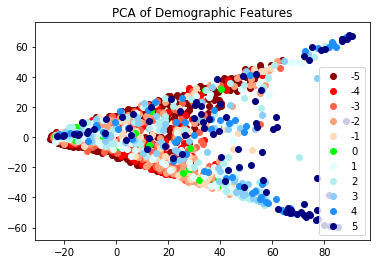

In [17]:
plot_pca_2d()

## Visualize clustering on the the 2d dataset

First with as many clusters as we have partisan scores

In [18]:
def plot_2d_clusters(clusters, features):
    colors = cm.rainbow(np.linspace(0, 1, len(np.unique(clusters))))
    for i in np.unique(clusters):
        plt.scatter(features[clusters == i, 0], features[clusters == i, 1], color=colors[i], marker='o', edgecolor="black", label=i)
    plt.legend(scatterpoints=1)
    plt.show()

In [19]:
def print_cluster_info(clusters):
    avg_stddev = np.mean([np.std(labels[np.where(clusters == i)]) for i in np.unique(clusters)])
    print("Average partisan score stddev for {} clusters: {}".format(len(np.unique(clusters)), round(avg_stddev, 1)))
    print()
    
    for i in np.unique(clusters):
        print("cluster {}:".format(i))
    
        partisan_scores = labels[np.where(clusters == i)]
        cluster_features = features[clusters == i]
    
        print("\tAverage partisan score: {} +/- {}".format(round(np.mean(partisan_scores), 1), round(np.std(partisan_scores, ddof=1), 1)))
        print()
    
        republican_pct = round(len(partisan_scores[partisan_scores < 0]) / len(partisan_scores) * 100, 1)
        democrat_pct = round(len(partisan_scores[partisan_scores > 0]) / len(partisan_scores) * 100, 1)
        even_pct = round(len(partisan_scores[partisan_scores == 0]) / len(partisan_scores) * 100, 1)
        
        pie_colors = ["red", "blue"]
        pie_labels = ["republican – {}%".format(republican_pct), "democrat – {}%".format(democrat_pct)]
        pie_percentages = [republican_pct, democrat_pct]
        
        if even_pct:
            pie_colors.append("purple")
            pie_labels.append("even – {}%".format(even_pct))
            pie_percentages.append(even_pct)
        
        patches, texts = plt.pie(pie_percentages, colors=pie_colors)
        plt.legend(patches, pie_labels, loc="center left", bbox_to_anchor=(-0.1, 1.1))
        plt.show()
        
        pie_percentages = [round(len(partisan_scores[partisan_scores == score]) / len(partisan_scores) * 100, 1) for score in np.unique(labels)]
        pie_colors = ["darkred", "red", "tomato", "lightsalmon", "peachpuff", "purple", "lightcyan", "paleturquoise", "lightskyblue", "dodgerblue", "navy"]
        pie_labels = ["{} – {}%".format(label, percentage) for label, percentage in zip(np.unique(labels), pie_percentages)]
        
        patches, texts = plt.pie(pie_percentages, colors=pie_colors)
        plt.legend(patches, pie_labels, loc="center left", bbox_to_anchor=(-0.1, 1.3))
        plt.show()
        
        avg_wht_not_hsp = round(np.mean(cluster_features[:, 0]), 1)
        wht_not_hsp_stddev = round(np.std(cluster_features[:, 0]), 1)
        print("\tAverage white not hispanic: {} +/- {}%".format(avg_wht_not_hsp, wht_not_hsp_stddev))
        
        avg_blk = round(np.mean(cluster_features[:, 1]), 1)
        blk_stddev = round(np.std(cluster_features[:, 1]), 1)
        print("\tAverage black: {} +/- {}%".format(avg_blk, blk_stddev))
        
        avg_hsp = round(np.mean(cluster_features[:, -3]), 1)
        hsp_stddev = round(np.std(cluster_features[:, -3]), 1)
        print("\tAverage hispanic: {} +/- {}%".format(avg_hsp, hsp_stddev))
        
        avg_college_educated = round(np.mean(cluster_features[:, -2]), 1)
        college_educated_stddev = round(np.std(cluster_features[:, -2]), 1)
        print("\tAverage college educated: {} +/- {}%".format(avg_college_educated, college_educated_stddev))
        
        avg_poverty = round(np.mean(cluster_features[:, -1]), 1)
        poverty_stddev = round(np.std(cluster_features[:, -1]), 1)
        print("\tAverage poverty: {} +/- {}%".format(avg_poverty, poverty_stddev))
        
        print()
        print()

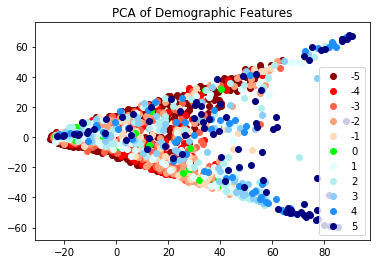

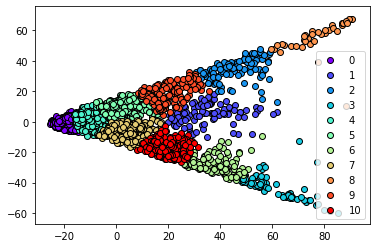

Average partisan score stddev for 11 clusters: 2.5

cluster 0:
	Average partisan score: -4.3 +/- 1.6



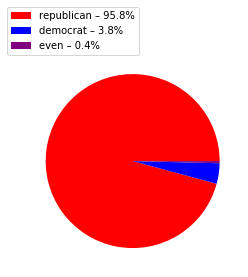

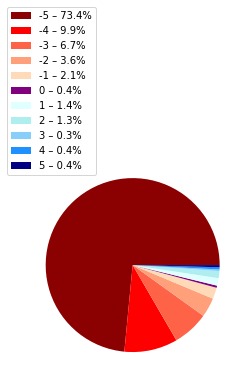

	Average white not hispanic: 93.5 +/- 2.2%
	Average black: 1.3 +/- 1.2%
	Average hispanic: 2.6 +/- 1.3%
	Average college educated: 19.4 +/- 7.0%
	Average poverty: 13.7 +/- 5.1%


cluster 1:
	Average partisan score: -0.2 +/- 3.7



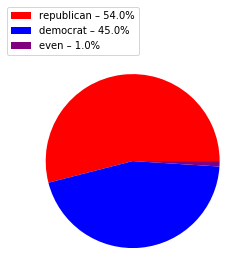

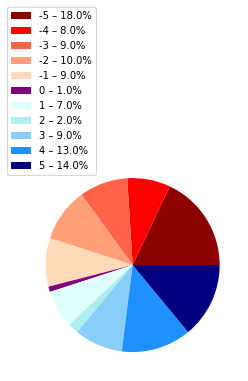

	Average white not hispanic: 43.3 +/- 13.3%
	Average black: 14.4 +/- 10.0%
	Average hispanic: 17.9 +/- 9.0%
	Average college educated: 24.8 +/- 12.7%
	Average poverty: 19.8 +/- 10.1%


cluster 2:
	Average partisan score: -2.3 +/- 3.3



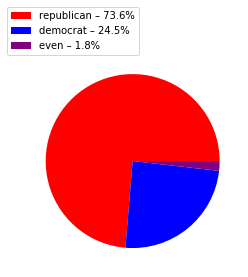

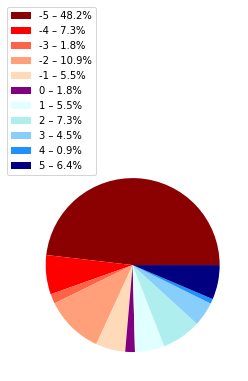

	Average white not hispanic: 37.9 +/- 7.4%
	Average black: 4.7 +/- 4.1%
	Average hispanic: 52.3 +/- 8.8%
	Average college educated: 18.4 +/- 7.6%
	Average poverty: 17.3 +/- 5.1%


cluster 3:
	Average partisan score: 3.5 +/- 1.3



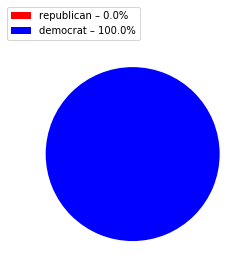

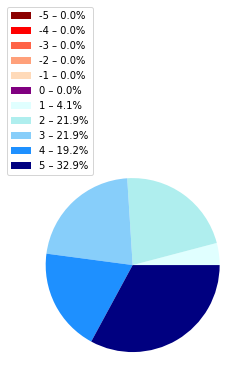

	Average white not hispanic: 29.6 +/- 7.9%
	Average black: 64.8 +/- 8.5%
	Average hispanic: 4.0 +/- 4.5%
	Average college educated: 15.9 +/- 6.6%
	Average poverty: 29.8 +/- 7.1%


cluster 4:
	Average partisan score: -3.6 +/- 2.2



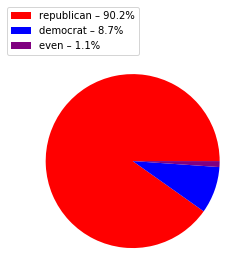

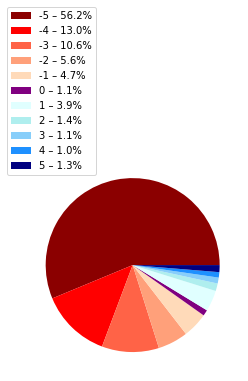

	Average white not hispanic: 85.0 +/- 3.0%
	Average black: 3.9 +/- 3.1%
	Average hispanic: 6.3 +/- 3.0%
	Average college educated: 24.2 +/- 9.7%
	Average poverty: 13.2 +/- 4.4%


cluster 5:
	Average partisan score: -3.3 +/- 2.6



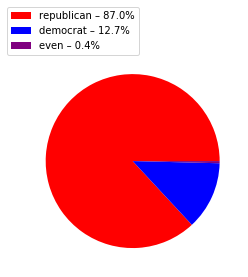

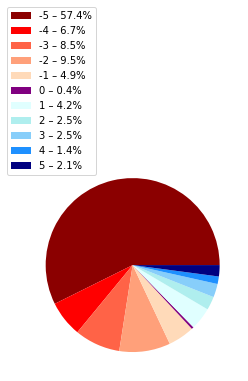

	Average white not hispanic: 73.4 +/- 5.2%
	Average black: 3.9 +/- 3.3%
	Average hispanic: 15.1 +/- 5.4%
	Average college educated: 24.7 +/- 11.2%
	Average poverty: 13.5 +/- 4.3%


cluster 6:
	Average partisan score: -0.2 +/- 2.4



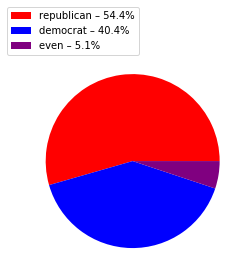

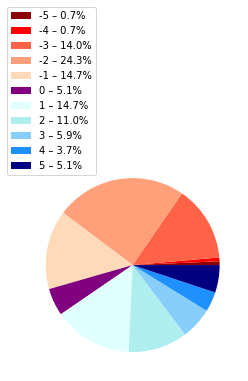

	Average white not hispanic: 47.7 +/- 5.8%
	Average black: 44.8 +/- 4.9%
	Average hispanic: 4.7 +/- 3.6%
	Average college educated: 17.5 +/- 8.5%
	Average poverty: 22.5 +/- 5.2%


cluster 7:
	Average partisan score: -3.6 +/- 2.3



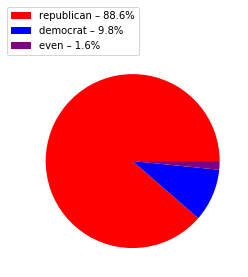

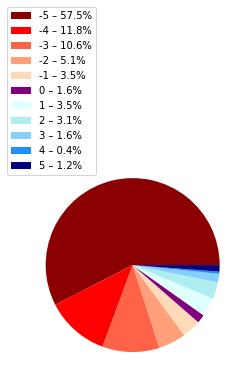

	Average white not hispanic: 73.2 +/- 5.1%
	Average black: 15.8 +/- 4.4%
	Average hispanic: 5.9 +/- 3.2%
	Average college educated: 22.1 +/- 9.8%
	Average poverty: 15.6 +/- 4.8%


cluster 8:
	Average partisan score: 2.6 +/- 2.9



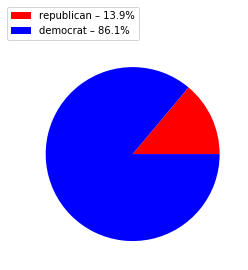

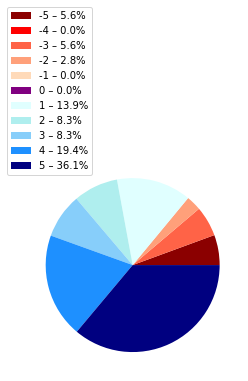

	Average white not hispanic: 13.8 +/- 7.0%
	Average black: 3.6 +/- 7.4%
	Average hispanic: 81.3 +/- 9.7%
	Average college educated: 14.5 +/- 5.6%
	Average poverty: 25.1 +/- 5.4%


cluster 9:
	Average partisan score: -2.9 +/- 3.1



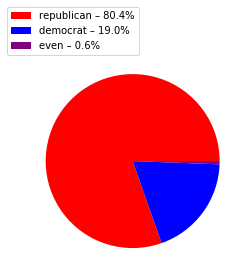

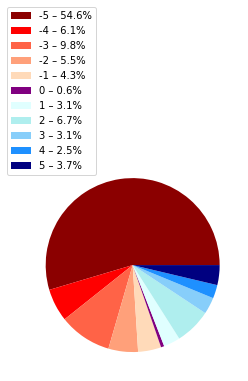

	Average white not hispanic: 59.0 +/- 5.6%
	Average black: 4.9 +/- 3.9%
	Average hispanic: 30.7 +/- 7.2%
	Average college educated: 23.3 +/- 10.9%
	Average poverty: 14.8 +/- 5.1%


cluster 10:
	Average partisan score: -2.9 +/- 2.3



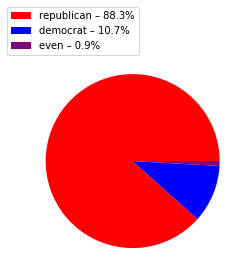

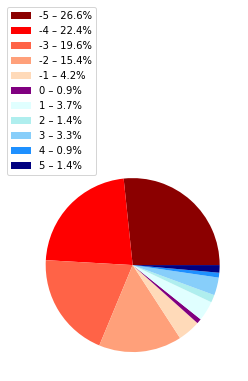

	Average white not hispanic: 61.9 +/- 4.3%
	Average black: 29.9 +/- 4.4%
	Average hispanic: 5.2 +/- 3.2%
	Average college educated: 19.4 +/- 8.8%
	Average poverty: 19.5 +/- 5.0%




In [20]:
clusters2d = KMeans(n_clusters=len(np.unique(labels))).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

Let's see if reducing the number of clusters yields a better generalization

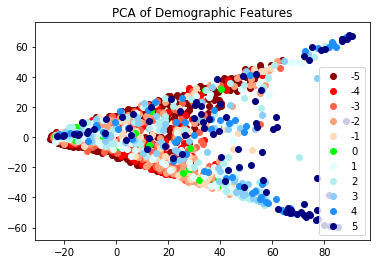

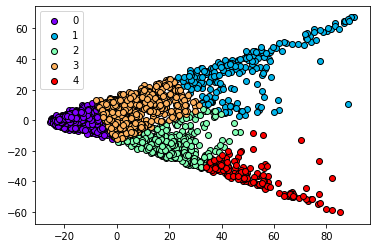

Average partisan score stddev for 5 clusters: 2.6

cluster 0:
	Average partisan score: -4.1 +/- 1.8



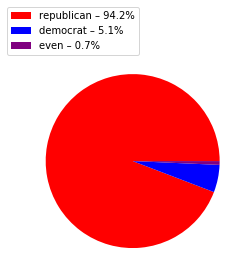

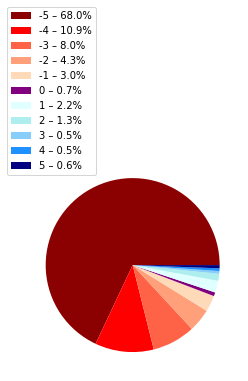

	Average white not hispanic: 90.6 +/- 4.7%
	Average black: 2.4 +/- 2.7%
	Average hispanic: 3.8 +/- 2.6%
	Average college educated: 21.0 +/- 8.2%
	Average poverty: 13.5 +/- 4.9%


cluster 1:
	Average partisan score: -0.9 +/- 3.9



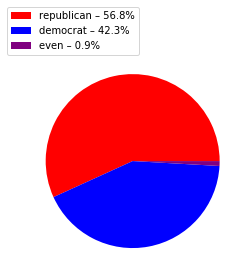

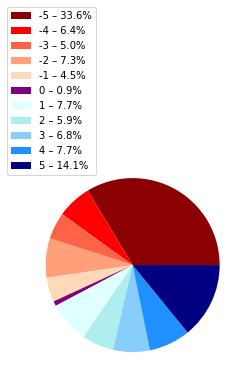

	Average white not hispanic: 35.3 +/- 13.8%
	Average black: 5.2 +/- 6.1%
	Average hispanic: 49.4 +/- 20.4%
	Average college educated: 19.6 +/- 9.2%
	Average poverty: 18.8 +/- 7.7%


cluster 2:
	Average partisan score: -2.6 +/- 2.6



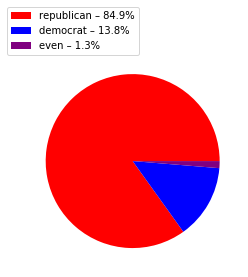

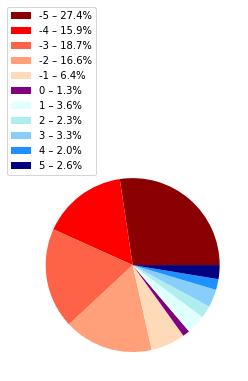

	Average white not hispanic: 60.5 +/- 8.3%
	Average black: 29.0 +/- 8.2%
	Average hispanic: 6.1 +/- 5.0%
	Average college educated: 19.8 +/- 9.7%
	Average poverty: 19.4 +/- 5.4%


cluster 3:
	Average partisan score: -3.2 +/- 2.7



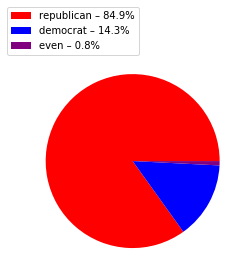

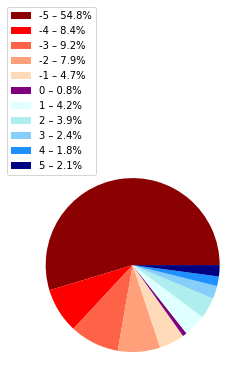

	Average white not hispanic: 70.4 +/- 7.9%
	Average black: 7.0 +/- 5.7%
	Average hispanic: 15.4 +/- 8.9%
	Average college educated: 24.2 +/- 11.1%
	Average poverty: 14.3 +/- 5.0%


cluster 4:
	Average partisan score: 2.3 +/- 2.2



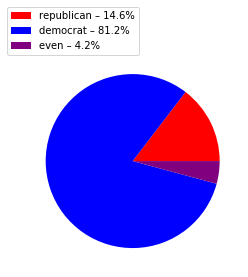

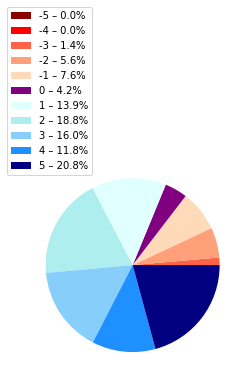

	Average white not hispanic: 36.3 +/- 9.4%
	Average black: 56.6 +/- 10.8%
	Average hispanic: 4.5 +/- 4.1%
	Average college educated: 16.8 +/- 8.1%
	Average poverty: 26.4 +/- 7.4%




In [21]:
clusters2d = KMeans(n_clusters=5).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

Try with different numbers of clusters

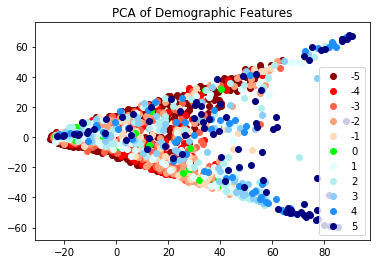

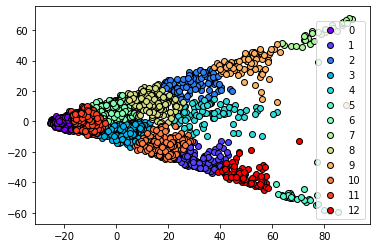

Average partisan score stddev for 13 clusters: 2.4

cluster 0:
	Average partisan score: -4.3 +/- 1.6



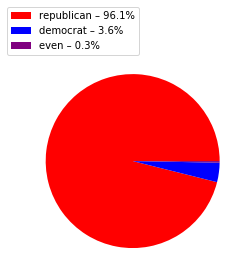

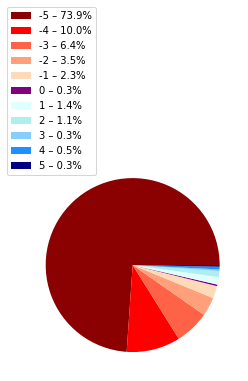

	Average white not hispanic: 93.8 +/- 2.0%
	Average black: 1.2 +/- 1.1%
	Average hispanic: 2.5 +/- 1.2%
	Average college educated: 19.3 +/- 6.8%
	Average poverty: 13.6 +/- 5.1%


cluster 1:
	Average partisan score: -1.4 +/- 2.0



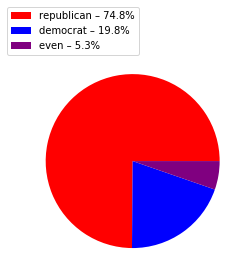

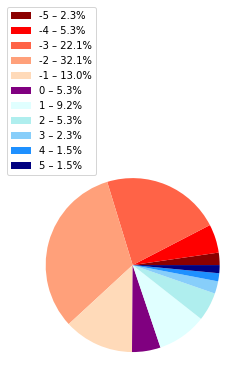

	Average white not hispanic: 52.3 +/- 4.8%
	Average black: 40.5 +/- 4.1%
	Average hispanic: 4.5 +/- 3.1%
	Average college educated: 17.8 +/- 8.0%
	Average poverty: 21.9 +/- 4.6%


cluster 2:
	Average partisan score: -3.0 +/- 3.2



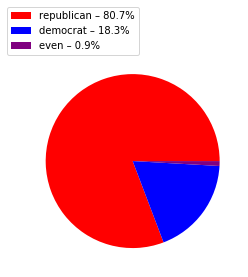

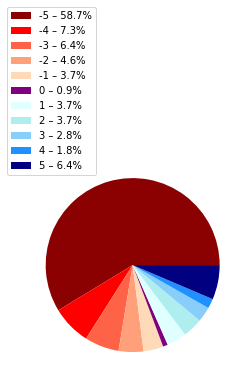

	Average white not hispanic: 51.6 +/- 6.3%
	Average black: 4.3 +/- 3.4%
	Average hispanic: 38.6 +/- 6.0%
	Average college educated: 21.4 +/- 9.2%
	Average poverty: 15.8 +/- 4.8%


cluster 3:
	Average partisan score: -3.6 +/- 2.3



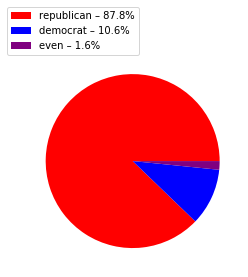

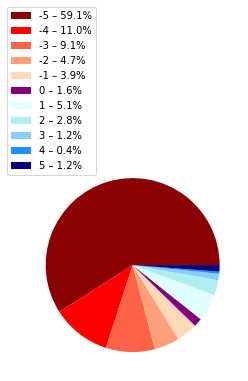

	Average white not hispanic: 74.4 +/- 4.8%
	Average black: 14.6 +/- 4.2%
	Average hispanic: 5.8 +/- 3.1%
	Average college educated: 22.1 +/- 9.9%
	Average poverty: 15.6 +/- 4.8%


cluster 4:
	Average partisan score: 0.0 +/- 3.6



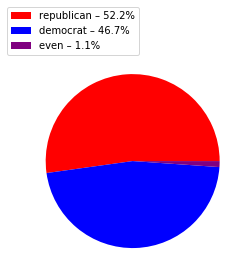

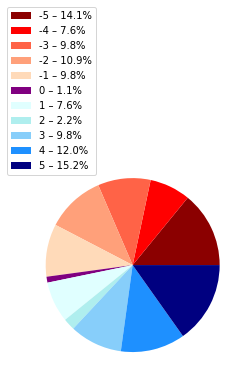

	Average white not hispanic: 42.4 +/- 13.4%
	Average black: 14.9 +/- 10.6%
	Average hispanic: 17.8 +/- 9.0%
	Average college educated: 24.8 +/- 12.4%
	Average poverty: 20.1 +/- 10.3%


cluster 5:
	Average partisan score: 4.7 +/- 0.5



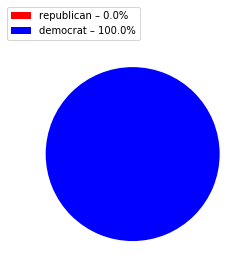

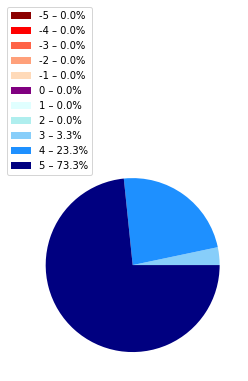

	Average white not hispanic: 21.8 +/- 5.5%
	Average black: 73.6 +/- 5.2%
	Average hispanic: 3.3 +/- 3.8%
	Average college educated: 16.1 +/- 5.1%
	Average poverty: 32.6 +/- 7.7%


cluster 6:
	Average partisan score: -3.3 +/- 2.6



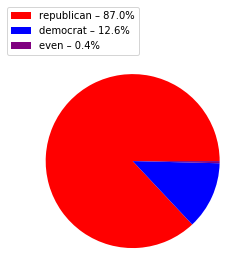

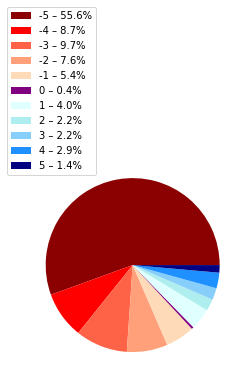

	Average white not hispanic: 76.7 +/- 4.1%
	Average black: 3.2 +/- 2.6%
	Average hispanic: 13.0 +/- 4.5%
	Average college educated: 25.6 +/- 11.5%
	Average poverty: 13.2 +/- 4.3%


cluster 7:
	Average partisan score: 3.2 +/- 2.4



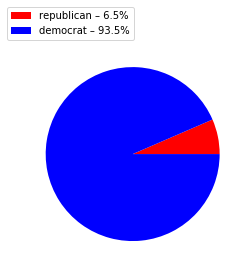

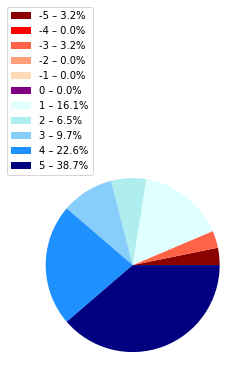

	Average white not hispanic: 12.3 +/- 5.9%
	Average black: 2.4 +/- 3.1%
	Average hispanic: 83.7 +/- 8.1%
	Average college educated: 14.2 +/- 5.4%
	Average poverty: 25.7 +/- 5.1%


cluster 8:
	Average partisan score: -2.9 +/- 2.9



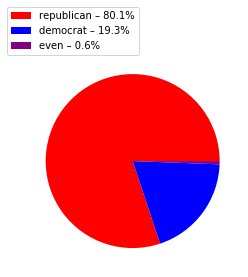

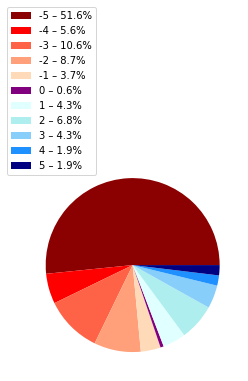

	Average white not hispanic: 64.2 +/- 4.8%
	Average black: 5.9 +/- 4.9%
	Average hispanic: 22.7 +/- 6.0%
	Average college educated: 24.8 +/- 11.5%
	Average poverty: 13.7 +/- 4.9%


cluster 9:
	Average partisan score: -2.0 +/- 3.4



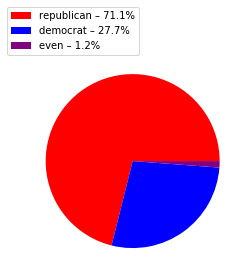

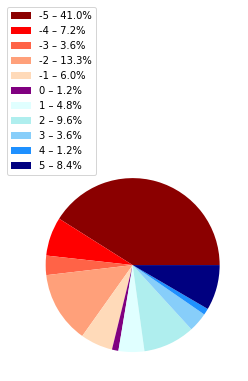

	Average white not hispanic: 34.0 +/- 6.8%
	Average black: 4.9 +/- 5.8%
	Average hispanic: 56.3 +/- 8.2%
	Average college educated: 17.1 +/- 6.5%
	Average poverty: 18.2 +/- 5.2%


cluster 10:
	Average partisan score: -3.0 +/- 2.5



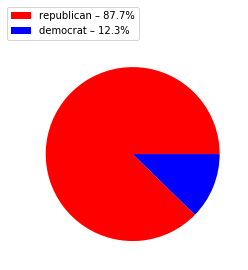

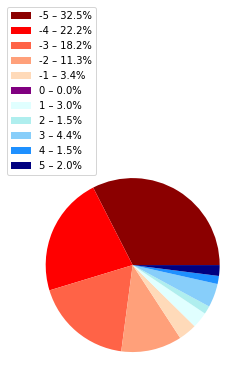

	Average white not hispanic: 63.3 +/- 4.2%
	Average black: 27.7 +/- 4.3%
	Average hispanic: 5.4 +/- 3.3%
	Average college educated: 20.2 +/- 9.9%
	Average poverty: 18.8 +/- 5.1%


cluster 11:
	Average partisan score: -3.7 +/- 2.1



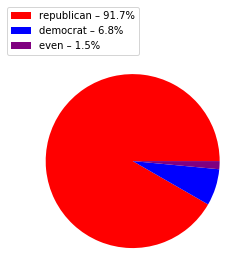

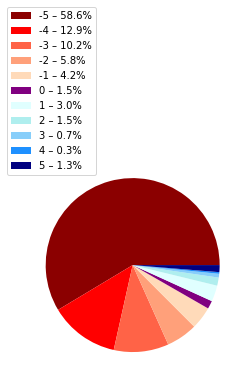

	Average white not hispanic: 86.1 +/- 2.6%
	Average black: 3.7 +/- 2.9%
	Average hispanic: 5.7 +/- 2.7%
	Average college educated: 23.4 +/- 9.1%
	Average poverty: 13.3 +/- 4.5%


cluster 12:
	Average partisan score: 2.2 +/- 1.6



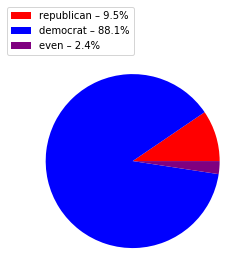

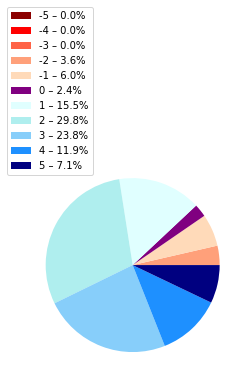

	Average white not hispanic: 38.3 +/- 4.6%
	Average black: 54.7 +/- 5.0%
	Average hispanic: 4.7 +/- 4.1%
	Average college educated: 16.8 +/- 8.6%
	Average poverty: 25.8 +/- 6.3%




In [22]:
clusters2d = KMeans(n_clusters=13).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

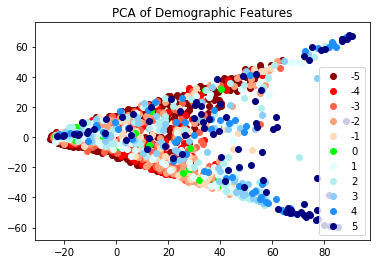

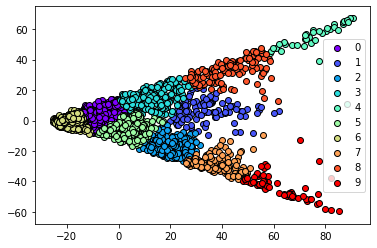

Average partisan score stddev for 10 clusters: 2.5

cluster 0:
	Average partisan score: -3.5 +/- 2.3



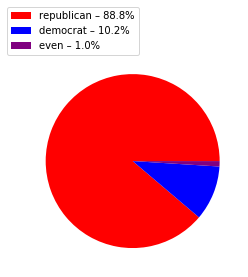

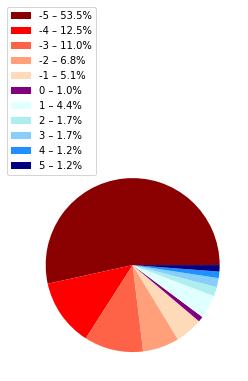

	Average white not hispanic: 82.2 +/- 4.0%
	Average black: 3.6 +/- 3.0%
	Average hispanic: 8.7 +/- 4.4%
	Average college educated: 24.9 +/- 10.3%
	Average poverty: 13.0 +/- 4.0%


cluster 1:
	Average partisan score: -0.3 +/- 3.8



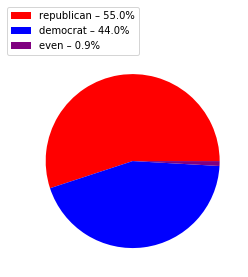

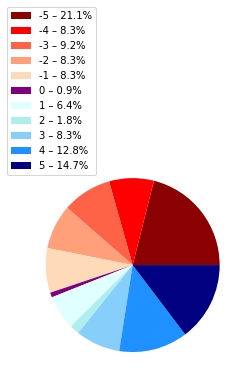

	Average white not hispanic: 44.1 +/- 13.0%
	Average black: 13.8 +/- 9.6%
	Average hispanic: 19.1 +/- 9.5%
	Average college educated: 25.3 +/- 13.3%
	Average poverty: 19.6 +/- 9.9%


cluster 2:
	Average partisan score: -2.9 +/- 2.3



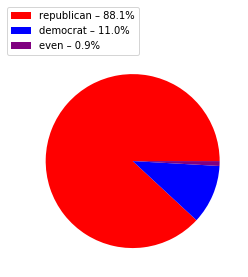

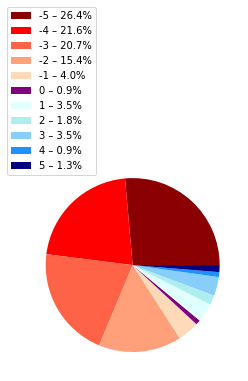

	Average white not hispanic: 61.9 +/- 4.5%
	Average black: 29.5 +/- 4.7%
	Average hispanic: 5.4 +/- 3.4%
	Average college educated: 19.8 +/- 9.0%
	Average poverty: 19.3 +/- 5.0%


cluster 3:
	Average partisan score: -2.9 +/- 3.0



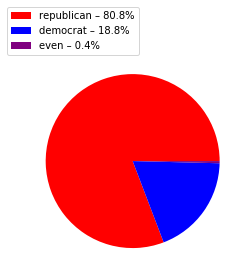

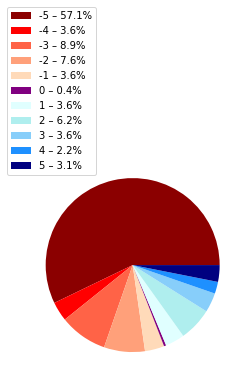

	Average white not hispanic: 64.9 +/- 5.8%
	Average black: 4.6 +/- 3.9%
	Average hispanic: 24.3 +/- 7.1%
	Average college educated: 24.4 +/- 11.2%
	Average poverty: 13.7 +/- 4.7%


cluster 4:
	Average partisan score: 2.4 +/- 3.0



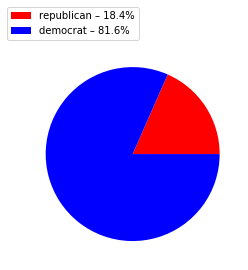

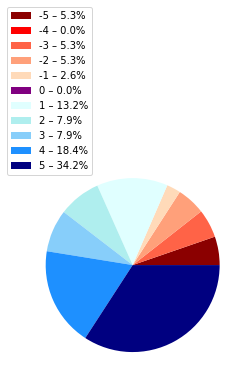

	Average white not hispanic: 14.5 +/- 7.6%
	Average black: 3.5 +/- 7.2%
	Average hispanic: 80.6 +/- 10.0%
	Average college educated: 14.5 +/- 5.5%
	Average poverty: 25.2 +/- 5.3%


cluster 5:
	Average partisan score: -3.6 +/- 2.3



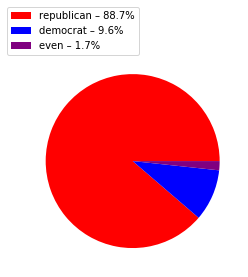

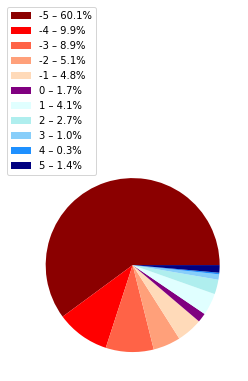

	Average white not hispanic: 73.5 +/- 5.1%
	Average black: 14.2 +/- 5.1%
	Average hispanic: 6.2 +/- 3.5%
	Average college educated: 22.0 +/- 9.8%
	Average poverty: 15.8 +/- 4.8%


cluster 6:
	Average partisan score: -4.2 +/- 1.7



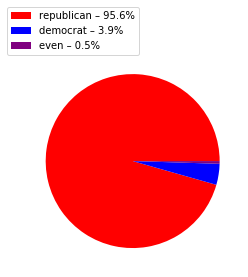

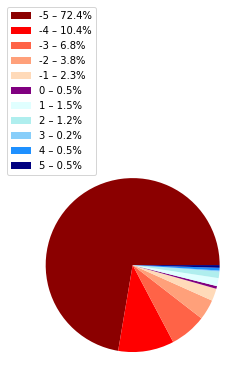

	Average white not hispanic: 92.8 +/- 2.7%
	Average black: 1.6 +/- 1.6%
	Average hispanic: 2.8 +/- 1.6%
	Average college educated: 19.8 +/- 7.2%
	Average poverty: 13.7 +/- 5.1%


cluster 7:
	Average partisan score: -0.1 +/- 2.4



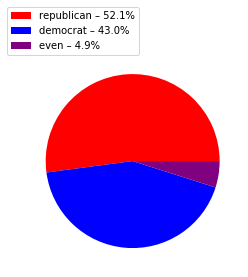

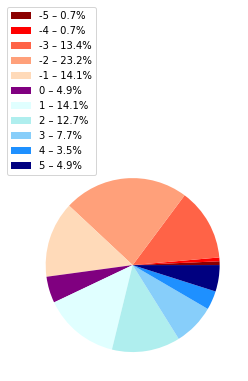

	Average white not hispanic: 47.3 +/- 6.0%
	Average black: 45.4 +/- 5.3%
	Average hispanic: 4.7 +/- 3.5%
	Average college educated: 17.2 +/- 8.3%
	Average poverty: 22.8 +/- 5.3%


cluster 8:
	Average partisan score: -2.5 +/- 3.2



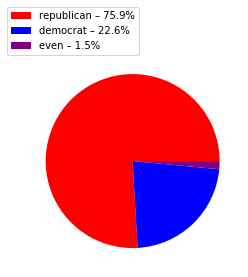

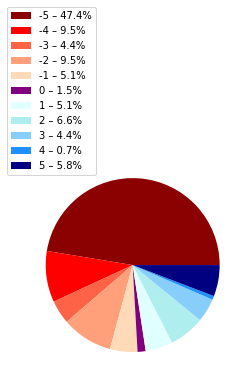

	Average white not hispanic: 40.8 +/- 8.6%
	Average black: 4.5 +/- 3.9%
	Average hispanic: 49.6 +/- 9.2%
	Average college educated: 19.0 +/- 7.7%
	Average poverty: 16.9 +/- 4.8%


cluster 9:
	Average partisan score: 3.7 +/- 1.3



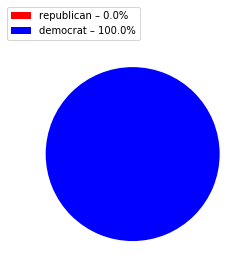

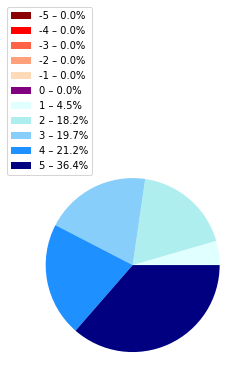

	Average white not hispanic: 28.6 +/- 7.6%
	Average black: 65.8 +/- 8.3%
	Average hispanic: 4.0 +/- 4.7%
	Average college educated: 16.1 +/- 6.6%
	Average poverty: 30.1 +/- 7.2%




In [23]:
clusters2d = KMeans(n_clusters=10).fit_predict(features2d)
plot_pca_2d()
plot_2d_clusters(clusters2d, features2d)
print_cluster_info(clusters2d)

# Clustering with all features

Average partisan score stddev for 10 clusters: 2.4

cluster 0:
	Average partisan score: -4.2 +/- 1.6



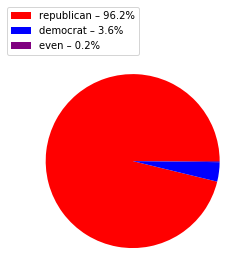

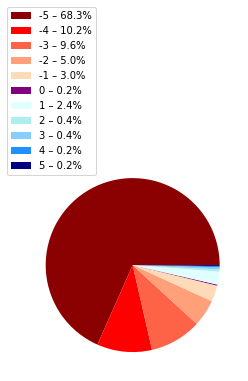

	Average white not hispanic: 76.8 +/- 5.4%
	Average black: 8.0 +/- 6.5%
	Average hispanic: 9.0 +/- 5.2%
	Average college educated: 19.1 +/- 5.2%
	Average poverty: 15.4 +/- 3.9%


cluster 1:
	Average partisan score: -2.9 +/- 1.9



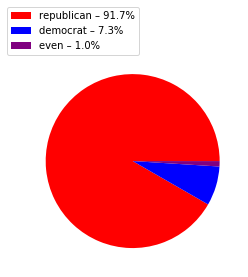

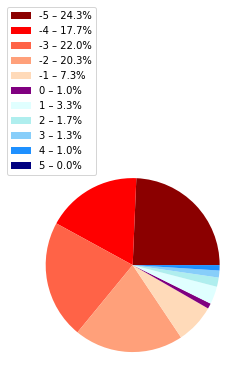

	Average white not hispanic: 59.7 +/- 6.6%
	Average black: 32.2 +/- 6.7%
	Average hispanic: 5.4 +/- 4.2%
	Average college educated: 17.1 +/- 6.1%
	Average poverty: 20.5 +/- 4.7%


cluster 2:
	Average partisan score: -2.7 +/- 3.1



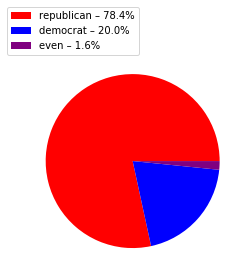

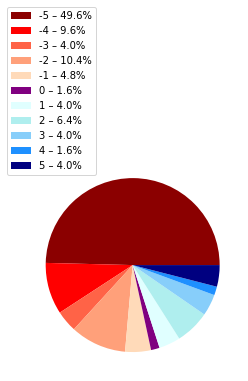

	Average white not hispanic: 40.5 +/- 7.8%
	Average black: 4.6 +/- 4.0%
	Average hispanic: 51.2 +/- 7.9%
	Average college educated: 18.1 +/- 6.6%
	Average poverty: 17.0 +/- 4.4%


cluster 3:
	Average partisan score: -4.5 +/- 1.1



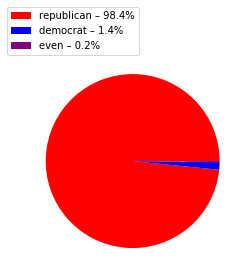

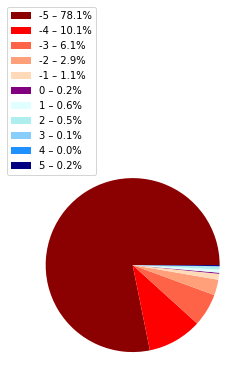

	Average white not hispanic: 92.4 +/- 3.3%
	Average black: 1.7 +/- 1.9%
	Average hispanic: 3.2 +/- 2.1%
	Average college educated: 17.6 +/- 4.4%
	Average poverty: 14.3 +/- 4.9%


cluster 4:
	Average partisan score: -0.5 +/- 3.3



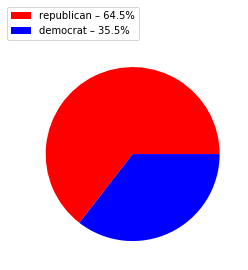

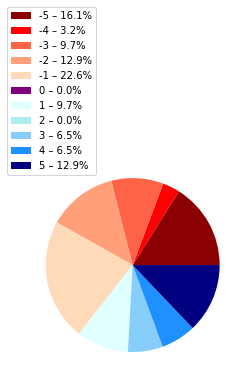

	Average white not hispanic: 30.8 +/- 14.5%
	Average black: 1.4 +/- 4.1%
	Average hispanic: 7.0 +/- 6.8%
	Average college educated: 16.0 +/- 3.3%
	Average poverty: 30.9 +/- 9.1%


cluster 5:
	Average partisan score: -3.6 +/- 2.4



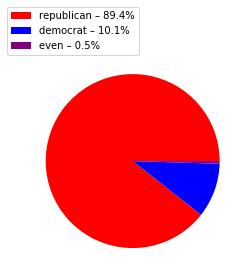

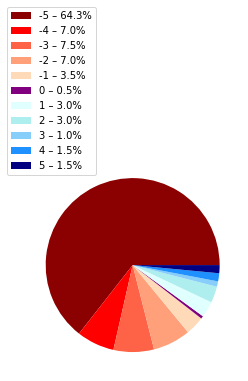

	Average white not hispanic: 62.0 +/- 6.6%
	Average black: 6.3 +/- 6.0%
	Average hispanic: 27.5 +/- 6.0%
	Average college educated: 20.1 +/- 6.8%
	Average poverty: 15.4 +/- 5.1%


cluster 6:
	Average partisan score: 1.7 +/- 2.9



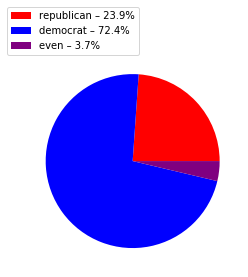

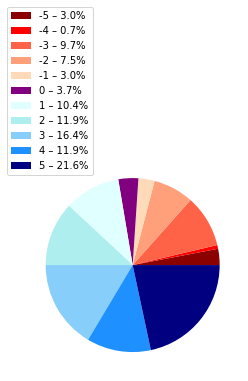

	Average white not hispanic: 56.5 +/- 12.2%
	Average black: 16.2 +/- 9.4%
	Average hispanic: 15.3 +/- 8.0%
	Average college educated: 42.0 +/- 9.4%
	Average poverty: 11.4 +/- 4.8%


cluster 7:
	Average partisan score: 2.5 +/- 2.0



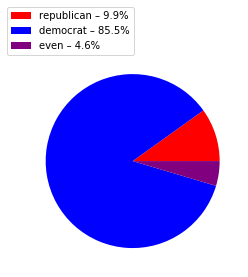

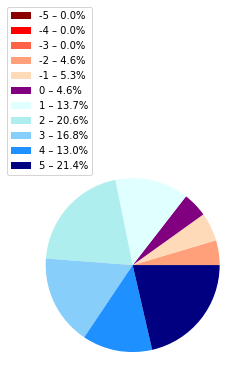

	Average white not hispanic: 35.5 +/- 9.2%
	Average black: 58.0 +/- 10.1%
	Average hispanic: 4.4 +/- 4.2%
	Average college educated: 16.5 +/- 7.0%
	Average poverty: 26.7 +/- 7.5%


cluster 8:
	Average partisan score: 2.5 +/- 3.0



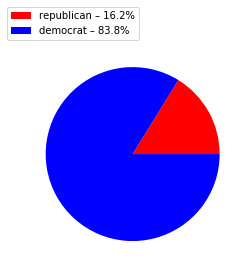

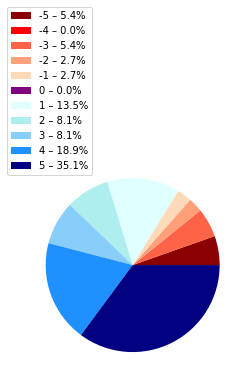

	Average white not hispanic: 14.2 +/- 7.4%
	Average black: 3.6 +/- 7.3%
	Average hispanic: 81.0 +/- 9.8%
	Average college educated: 14.5 +/- 5.6%
	Average poverty: 25.2 +/- 5.3%


cluster 9:
	Average partisan score: -2.2 +/- 2.8



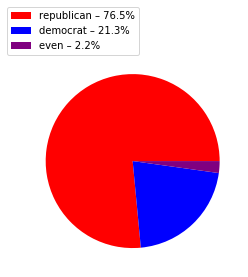

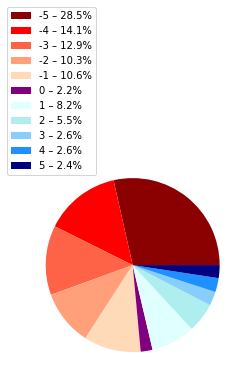

	Average white not hispanic: 85.7 +/- 5.7%
	Average black: 3.7 +/- 3.6%
	Average hispanic: 5.8 +/- 3.6%
	Average college educated: 34.4 +/- 7.5%
	Average poverty: 10.3 +/- 3.9%




In [24]:
clusters = KMeans(n_clusters=10).fit_predict(features)
print_cluster_info(clusters)